Import necessary libraries:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Generate input data (100 points between 0 and π)
X_train = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
# Generate target data using sine function
# Use random.normal function to simulate gaussian noise on data
y_train = np.zeros(len(X_train))
for i in range(len(X_train)):
    y_train[i] = np.random.normal(loc=0, scale=0.2) + np.sin(X_train[i])

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Dataset and DataLoader (use mini-batches of 128)
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)  



C:\Users\kiena\AppData\Local\Temp\ipykernel_16464\2916867667.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train[i] = np.random.normal(loc=0, scale=0.2) + np.sin(X_train[i])


In [3]:
# Now define a simple neural network

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 128)    # Input Layer. nn.Linear gives us a dense layer
        #self.layer2 = nn.Linear(24, 24)   # Hidden Layer
        self.layer3 = nn.Linear(128, 128)   # Hidden Layer 2
        self.layer4 = nn.Linear(128, 1)    # Output Layer

    # Define the forward propagation of the network
    def forward(self, x):
        x = torch.relu(self.layer1(x))    # Using relu activation for now
        #x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)                # No activation for final layer 
        return x

# Initialize model
model = NeuralNetwork()


In [4]:
# Loss function. Use mean-squared error for now:
criterion = nn.MSELoss()

#Optimizer: Adam. Start with lr of 0.01
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [100/1000], Loss: 0.0501
Epoch [200/1000], Loss: 0.0404
Epoch [300/1000], Loss: 0.0418
Epoch [400/1000], Loss: 0.0401
Epoch [500/1000], Loss: 0.0404
Epoch [600/1000], Loss: 0.0392
Epoch [700/1000], Loss: 0.0398
Epoch [800/1000], Loss: 0.0396
Epoch [900/1000], Loss: 0.0395
Epoch [1000/1000], Loss: 0.0393


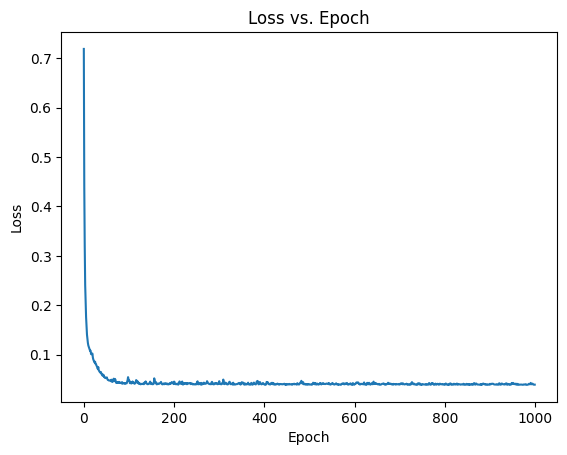

In [5]:
# Number of epochs
epochs = 1000
loss_values = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0
    
    for X_batch, y_batch in dataloader:  # Iterate over mini-batches
        # Forward pass: compute the model output
        outputs = model(X_batch)

        # Compute the loss
        loss = criterion(outputs, y_batch.view(-1, 1))  # Reshape target to match prediction

        # Backward pass and optimization
        optimizer.zero_grad()   # Zero the gradients
        loss.backward()         # Backpropagate the loss
        optimizer.step()        # Adjust weights

        # Accumulate the loss for this batch
        epoch_loss += loss.item()

    # Store average loss value for this epoch
    avg_loss = epoch_loss / len(dataloader)
    loss_values.append(avg_loss)

    # Print the average loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
plt.plot(range(epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

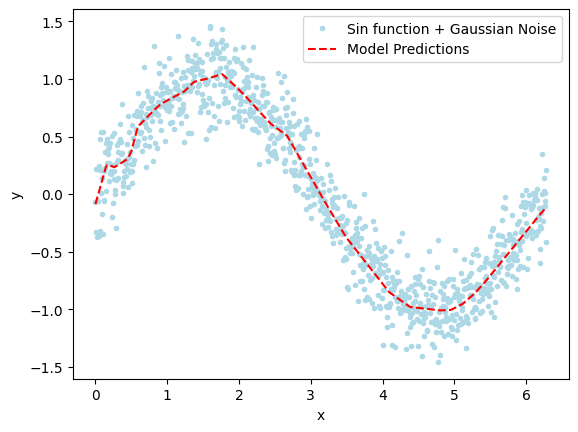

In [6]:
# Set the model to evaluation mode
model.eval()

# Generate predictions (detach from computation graph)
with torch.no_grad():
    predictions = model(X_train).numpy()

# Plot results
X_train_np = X_train.numpy()
y_train_np = y_train.numpy()

plt.plot(X_train_np, y_train_np, linestyle='None', marker='.', label="Sin function + Gaussian Noise", color="lightblue")
plt.plot(X_train_np, predictions, label="Model Predictions", linestyle='dashed', color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()